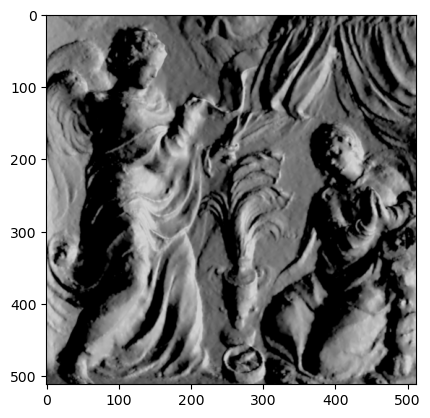

In [1]:
#Lambertian Photometric stereo example
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

all_images = []
for fname in sorted(glob.glob(f"{"SynthData/material_4/"}/*.png")):
    img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE).flatten() 
    all_images.append(img.astype(np.float32) / 255.0)
    
img = cv2.imread(fname,cv2.IMREAD_COLOR_BGR)
plt.imshow(img)


(102, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7613429077294017..0.999999934728448].


(262144, 3)


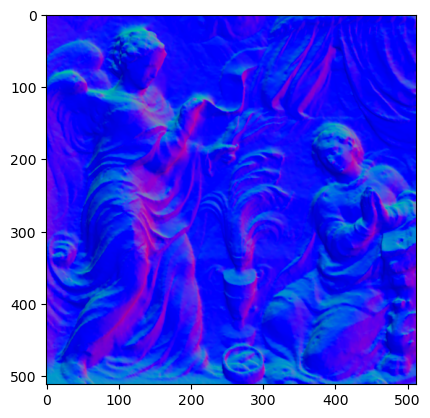

In [2]:

L = np.loadtxt("SynthData/lights.txt")
L = L / np.linalg.norm(L, ord=2, axis=1, keepdims=True)
print(L.shape)
images = np.stack(all_images)


norms=np.linalg.lstsq(L, images, rcond=None)[0].T
print(norms.shape)
magnitudes = np.linalg.norm(norms, axis=1, keepdims=True)
norms /= magnitudes
norms = norms.reshape(img.shape)

plt.imshow(norms)

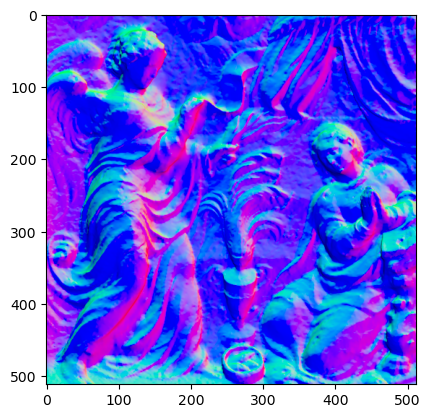

In [5]:
normalsGT = cv2.imread("SynthData/normal_map.png",cv2.IMREAD_COLOR_RGB)
plt.imshow(normalsGT)